In [82]:
import numpy as np
import matplotlib.pyplot as plt

class Gradient_Decent_Model:
    def __init__(self,X_train,Y_train,X_test,Y_test,eta) -> None:
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        self.N = X_train.shape[0]
        self.d = X_train.shape[1]
        self.W = np.ones((self.d,))
        self.eta = eta
        self.loss = []

    def sigmoid(self,x):  
        return np.exp(-np.logaddexp(0, -x))
    def suffle(self):
        train_size = self.X_train.shape[0]
        permutation = np.random.permutation(train_size)
        self.X_train = self.X_train[permutation]
        self.Y_train = self.Y_train[permutation]
    def train_batch(self,index,batch_size):
        X = self.X_train[index:index+batch_size]
        Y = self.Y_train[index:index+batch_size]
        
        gradient = np.zeros((self.d,))
        # 计算梯度
        for i in range(X.shape[0]):
            gradient += (self.sigmoid(-Y[i] * (self.W.dot(X[i]))) * (-Y[i] * X[i]))
        gradient /= X.shape[0]    
        # 梯度下降
        self.W = self.W - self.eta * gradient
    def train(self,epoch,batch_size,has_log):
        for epoch_i in range(1,epoch+1):
            self.suffle()
            for index in range(0,self.N,batch_size):
                self.train_batch(index,batch_size)
            if has_log:
                print("epoch = " + str(epoch_i) + "  W = ",end='')
                print(self.W)
            # Loss
            loss = 0
            for i in range(self.N):
                loss += np.log(1 + np.exp(-self.Y_train[i]*self.W.dot(self.X_train[i])))
            loss /= self.N
            if has_log:
                print("Loss = " + str(loss))
            self.loss.append(loss)
        # 计算accuracy
        predict = np.sign(self.X_train.dot(self.W))
        miss_predict = np.absolute(predict - self.Y_train)
        error_number = np.count_nonzero(miss_predict)
        accuracy = 1 - error_number / self.N
        print("Accuracy = " + str(accuracy))
        return self.W
    def show_loss_plot(self):
        plt.plot(list(range(1,len(self.loss)+1)),self.loss)
        plt.show()
    def single_test(self):
        predict = np.sign(self.X_train.dot(self.W))
        miss_predict = np.absolute(predict - self.Y_train)
        error_number = np.count_nonzero(miss_predict)
        accuracy = 1 - error_number / self.N
        return accuracy
    def test(self):
        print("Test Result:")
        N = self.X_test.shape[0]
        # 计算Loss
        loss = 0
        for i in range(N):
            loss += np.log(1 + np.exp(-self.Y_test[i]*self.W.dot(self.X_test[i])))
        loss /= N
        print("Loss = " + str(loss))
        # 计算accuracy
        predict = np.sign(self.X_test.dot(self.W))
        miss_predict = np.absolute(predict - self.Y_test)
        error_number = np.count_nonzero(miss_predict)
        accuracy = 1 - error_number / N
        print("Accuracy = " + str(accuracy))
        self.show_loss_plot()
        self.predict_probability = self.sigmoid(self.X_test.dot(self.W))
    def show_predict_probability(self):
        for i in range(self.X_test.shape[0]):
            print("data = {} , belongs to {} , probability = {} , real class is {}".format(self.X_test[i][0:2],"+1" if self.predict_probability[i] > 0.5 else "-1",self.predict_probability[i] if self.predict_probability[i] > 0.5 else 1 - self.predict_probability[i],"+1" if self.Y_test[i] == 1 else "-1"))


def gen_data(u10,sigma10,u11,sigma11,u20,sigma20,u21,sigma21,n : int = 200):
    # 协方差矩阵等于单位矩阵 <=> 独立
    x1_0 = np.random.normal(u10,sigma10,n).reshape(n,1)
    x1_1 = np.random.normal(u11,sigma11,n).reshape(n,1)
    x1_2 = np.ones((n,1))
    x1 = np.concatenate((x1_0,x1_1,x1_2),axis=1)
    y1 = np.ones((n,))
    x2_0 = np.random.normal(u20,sigma20,n).reshape(n,1)
    x2_1 = np.random.normal(u21,sigma21,n).reshape(n,1)
    x2_2 = np.ones((n,1))
    x2 = np.concatenate((x2_0, x2_1,x2_2), axis=1)
    y2 = - np.ones(n,)
    train_set_x = np.concatenate((x1[0:int(0.8 * n),],x2[0:int(0.8 * n),]))
    train_set_y = np.concatenate((y1[0:int(0.8 * n),],y2[0:int(0.8 * n),]))
    test_set_x = np.concatenate((x1[int(0.8 * n):,],x2[int(0.8 * n):,]))
    test_set_y = np.concatenate((y1[int(0.8 * n):, ], y2[int(0.8 * n):, ]))
    return (train_set_x,train_set_y,test_set_x,test_set_y)


In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

def plot_data(train_set_x,train_set_y,test_set_x,test_set_y):
    N_train = train_set_x.shape[0]
    half_N_train = N_train // 2
    N_test = test_set_x.shape[0]
    half_N_test = N_test // 2    
    plt.scatter(train_set_x[half_N_train:,0], train_set_x[half_N_train:,1],c='red',marker='v',alpha=0.6)
    plt.scatter(train_set_x[0:half_N_train,0], train_set_x[0:half_N_train,1],c='blue',marker='v',alpha=0.6)
    plt.scatter(test_set_x[half_N_test:,0], test_set_x[half_N_test:,1],c='red',alpha=0.6)
    plt.scatter(test_set_x[0:half_N_test,0], test_set_x[0:half_N_test,1],c='blue',alpha=0.6)
    abline(-model.W[0]/model.W[1],-model.W[2]/model.W[1])
    plt.show()

## 第一组数据

正确率，loss图像

Accuracy = 1.0
Test Result:
Loss = 0.0887588989004366
Accuracy = 1.0


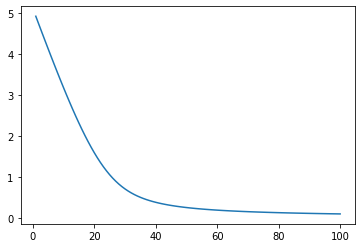

In [83]:
train_set_x,train_set_y,test_set_x,test_set_y = gen_data(-5,1,0,1,0,1,5,1)
model = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model.train(100,20,0)
model.test()

数据集与分类面

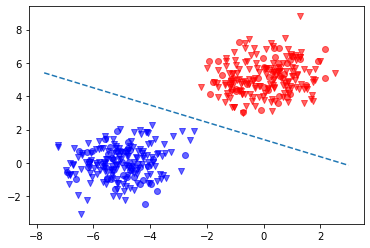

In [84]:
plot_data(train_set_x,train_set_y,test_set_x,test_set_y)

预测的概率值

In [85]:
model.show_predict_probability()

data = [-5.31858672  0.22255563] , belongs to +1 , probability = 0.9303495885009653 , real class is +1
data = [-2.75629786  0.4970114 ] , belongs to +1 , probability = 0.8231779990539193 , real class is +1
data = [-5.35750613  0.30961903] , belongs to +1 , probability = 0.9274348346299937 , real class is +1
data = [-6.51560148  0.69808196] , belongs to +1 , probability = 0.9362235373135612 , real class is +1
data = [-5.21934954  0.74034305] , belongs to +1 , probability = 0.9017575365290446 , real class is +1
data = [-5.53500738 -0.97897157] , belongs to +1 , probability = 0.969466451297737 , real class is +1
data = [-3.74459859 -1.66644201] , belongs to +1 , probability = 0.9644645993865946 , real class is +1
data = [-4.35758013 -0.26103526] , belongs to +1 , probability = 0.9297862597085451 , real class is +1
data = [-4.78501323  0.89744431] , belongs to +1 , probability = 0.8771093915678474 , real class is +1
data = [-4.69975001  0.78853119] , belongs to +1 , probability = 0.8816432

## 第二组数据

生成数据 & 训练

得到正确率与训练loss曲线



Accuracy = 0.75625
Test Result:
Loss = 0.5583196120410927
Accuracy = 0.725


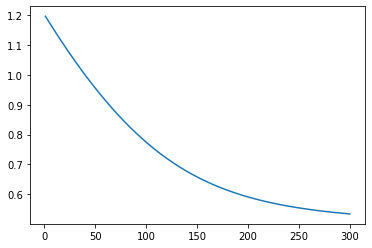

In [86]:
train_set_x,train_set_y,test_set_x,test_set_y = gen_data(1,1,0,1,0,1,1,1)
model = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model.train(300,20,0)
model.test()

数据集与分类面

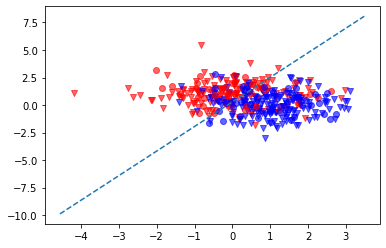

In [87]:
plot_data(train_set_x,train_set_y,test_set_x,test_set_y)

预测概率

In [88]:
model.show_predict_probability()

data = [ 2.42813036 -0.83993111] , belongs to +1 , probability = 0.9278691557128504 , real class is +1
data = [0.10563492 0.15511183] , belongs to +1 , probability = 0.5354560778484184 , real class is +1
data = [-0.24558751 -1.47770674] , belongs to +1 , probability = 0.616381998263747 , real class is +1
data = [2.2957078  0.15546786] , belongs to +1 , probability = 0.8859480484718594 , real class is +1
data = [0.21727556 0.24458914] , belongs to +1 , probability = 0.5509124671090363 , real class is +1
data = [-0.34818325  0.39468164] , belongs to -1 , probability = 0.585878597165147 , real class is +1
data = [ 1.85367763 -0.01841   ] , belongs to +1 , probability = 0.8497761487823577 , real class is +1
data = [2.09112653 0.03410565] , belongs to +1 , probability = 0.8720488433425906 , real class is +1
data = [2.50040624 1.07389094] , belongs to +1 , probability = 0.8663885627020305 , real class is +1
data = [0.47445221 0.13777068] , belongs to +1 , probability = 0.6154237207476018 , r

我们可以看到，相对于上面的数据，本组数据由于类间间距更小，使得模型更加难以训练训练（所需的训练epoch更多，需要接近300个epoch才能达到较好的效果）。并且可以注意到，在训练数据集基本相同，一个batch为20，学习率均为0.001的情况下，Logistic回归模型相比于线性回归模型所需的训练epoch更多，也就是学习更加困难。

## 改变各类超参数

In [89]:
train_set_x,train_set_y,test_set_x,test_set_y = gen_data(1,1,0,1,0,1,1,1)

讨论batch size对模型的影响

Accuracy = 0.528125
Test Result:
Loss = 0.9615106087809219
Accuracy = 0.5375


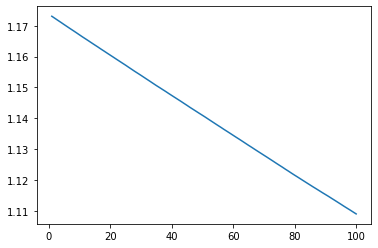

Accuracy = 0.5375
Test Result:
Loss = 0.9164323986902891
Accuracy = 0.5375


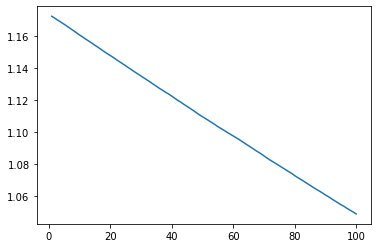

Accuracy = 0.534375
Test Result:
Loss = 0.8540075569104195
Accuracy = 0.5625


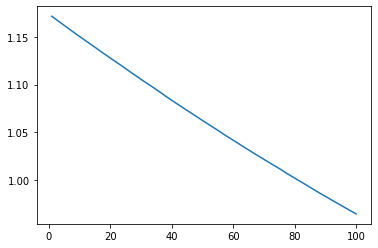

Accuracy = 0.56875
Test Result:
Loss = 0.7121081587375737
Accuracy = 0.6


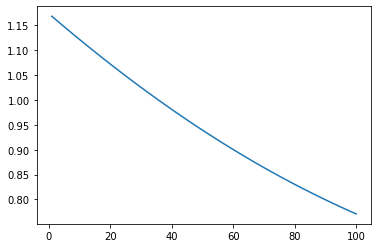

Accuracy = 0.675
Test Result:
Loss = 0.589184291510332
Accuracy = 0.6375


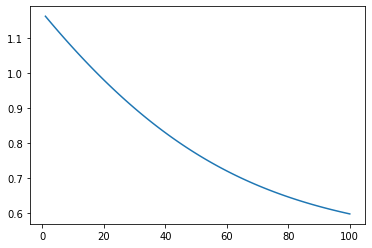

Accuracy = 0.73125
Test Result:
Loss = 0.5386155100998024
Accuracy = 0.7375


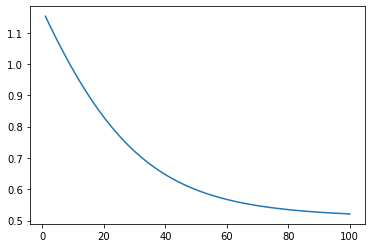

Accuracy = 0.746875
Test Result:
Loss = 0.5361760652114844
Accuracy = 0.75


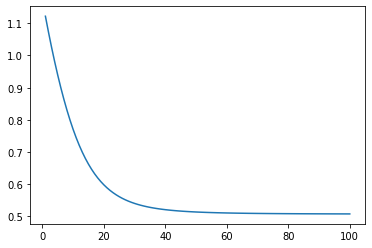

Accuracy = 0.746875
Test Result:
Loss = 0.5388001094380729
Accuracy = 0.7375


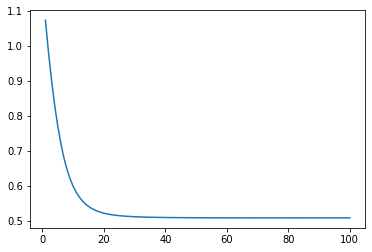

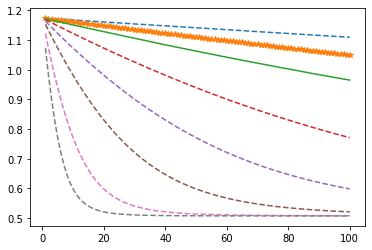

In [90]:
model_200 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_200.train(100,200,0)
model_200.test()

model_100 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_100.train(100,100,0)
model_100.test()

model_50 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_50.train(100,50,0)
model_50.test()

model_20 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_20.train(100,20,0)
model_20.test()

model_10 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_10.train(100,10,0)
model_10.test()

model_5 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_5.train(100,5,0)
model_5.test()

model_2 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_2.train(100,2,0)
model_2.test()

model_1 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_1.train(100,1,0)
model_1.test()

plt.plot(list(range(1,101)),model_200.loss,'--')
plt.plot(list(range(1,101)),model_100.loss,'*')
plt.plot(list(range(1,101)),model_50.loss)
plt.plot(list(range(1,101)),model_20.loss,'--')
plt.plot(list(range(1,101)),model_10.loss,'--')
plt.plot(list(range(1,101)),model_5.loss,'--')
plt.plot(list(range(1,101)),model_2.loss,'--')
plt.plot(list(range(1,101)),model_1.loss,'--')

plt.show()

我们可以看到，随着batch size的增大，模型收敛的时间就越短，模型拟合度高，正确率高。

讨论学习率对模型的影响

----------eta = 0.01------------
Accuracy = 0.753125
Test Result:
Loss = 0.5397503242415553
Accuracy = 0.7375


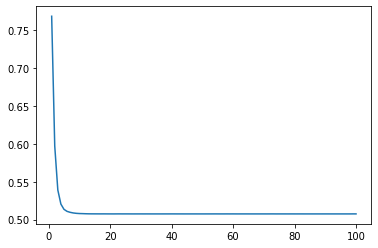

----------eta = 0.01------------
Accuracy = 0.746875
Test Result:
Loss = 0.5361850519784316
Accuracy = 0.75


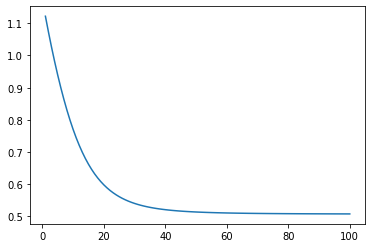

----------eta = 0.001------------
Accuracy = 0.56875
Test Result:
Loss = 0.7121069967533188
Accuracy = 0.6


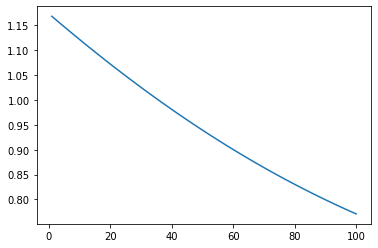

----------eta = 0.0005------------
Accuracy = 0.5375
Test Result:
Loss = 0.8353542411001407
Accuracy = 0.5625


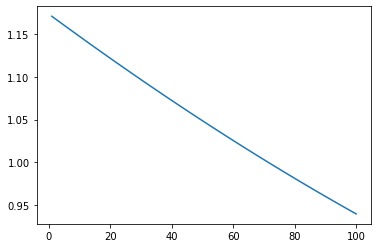

----------eta = 0.0001------------
Accuracy = 0.528125
Test Result:
Loss = 0.9710760332510384
Accuracy = 0.525


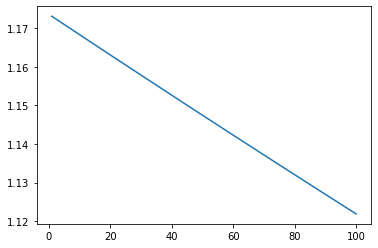

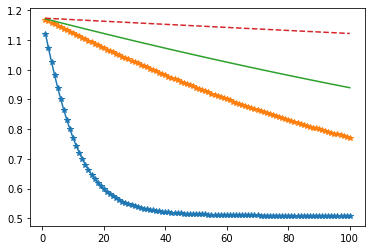

In [91]:
print("----------eta = 0.01------------")
model_1 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.1)
model_1.train(100,20,0)
model_1.test()

print("----------eta = 0.01------------")
model_01 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.01)
model_01.train(100,20,0)
model_01.test()

print("----------eta = 0.001------------")
model_001 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.001)
model_001.train(100,20,0)
model_001.test()

print("----------eta = 0.0005------------")
model_0005 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.0005)
model_0005.train(100,20,0)
model_0005.test()

print("----------eta = 0.0001------------")
model_0001 = Gradient_Decent_Model(train_set_x,train_set_y,test_set_x,test_set_y,0.0001)
model_0001.train(100,20,0)
model_0001.test()

plt.plot(list(range(1,101)),model_01.loss,'*-')
plt.plot(list(range(1,101)),model_001.loss,'*')
plt.plot(list(range(1,101)),model_0005.loss)
plt.plot(list(range(1,101)),model_0001.loss,'--')

plt.show()

我们可以看到，随着学习率的增大，模型达到收敛的速度增大，模型训练所需的epoch减小。